<a href="https://colab.research.google.com/github/femartinsamorim/tera_datascience_e_machinelearning/blob/main/analise_exploratoria_desafio_inferencia_Tera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?

**Analise Final**: 



*   Gênero: Teste de Hipotese "Alternativo" possui associação (Feminino)
*   Idade: Teste de Hipotese "Nulo" não possui associação.
*   Tempo de Atividade (Físicas): Teste de Hipotese "Nulo" não possui associação.
*   Raça/Etnia: Teste de Hipotese "Alternativo" possui associação (Americano/México e Outros)
*   Escolaridade: Teste de Hipotese "Alternativo" possui associação (Superior Incompleto e Médio)
*   Renda Anual Familiar: Teste de Hipotese "Alternativo" possui associação (Renda entre 20000 a 30000)
*   Grupo de Aderencia (Atividades): Teste de Hipotese "Alternativo" possui associação (Grupos de baixa aderencia)



**Dicionários das bases**:

DEMO_PHQ.csv: banco de dados contendo 5334 observações de adultos pesquisados no NHANES 2005-2006

PAG_HEI.csv: banco de dados contendo 9424 observações de crianças e adultos pesquisados no NHANES 2005-2006



In [1]:
# BIBLIOTECAS UTILIZADAS

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [2]:
# IMPORTANDO AS BASES DE DADOS

df_depression = pd.read_csv('/content/DEMO_PHQ.csv',delimiter=',')
df_heathly_habits = pd.read_csv('/content/PAG_HEI.csv', delimiter=',')

In [3]:
# RENOMEANDO A BASE DE DADOS (DEMO_PHQ)

df_depressao = df_depression.rename(columns={"SEQN":"Identificador","RIAGENDR":"Genero","RIDAGEYR":"Idade","RIDRETH1":"Etnia",\
                                             "DMDEDUC":"Escolaridade","INDFMINC":"Renda_Anual"})

In [4]:
df_depressao.head(8)

,Identificador,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Genero,Idade,Etnia,Escolaridade,Renda_Anual
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,2,3,3.0
7,31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,85,3,2,1.0


In [5]:
df_depressao.describe().round().astype(int)

,Identificador,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Genero,Idade,Etnia,Escolaridade,Renda_Anual
count,5334,4836,4836,4836,4836,4836,4836,4836,4836,4836,5334,5334,5334,5334,5287
mean,36359,0,0,1,1,0,0,0,0,0,2,45,3,3,9
std,2965,1,1,1,1,1,1,1,1,0,0,20,1,1,13
min,31130,0,0,0,0,0,0,0,0,0,1,18,1,1,1
25%,33838,0,0,0,0,0,0,0,0,0,1,27,3,2,4
50%,36348,0,0,0,0,0,0,0,0,0,2,43,3,3,7
75%,38916,0,0,1,1,0,0,0,0,0,2,62,4,4,10
max,41473,9,9,9,9,9,9,9,9,9,2,85,5,9,99


In [6]:
df_depressao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Identificador  5334 non-null   int64  
 1   DPQ010         4836 non-null   float64
 2   DPQ020         4836 non-null   float64
 3   DPQ030         4836 non-null   float64
 4   DPQ040         4836 non-null   float64
 5   DPQ050         4836 non-null   float64
 6   DPQ060         4836 non-null   float64
 7   DPQ070         4836 non-null   float64
 8   DPQ080         4836 non-null   float64
 9   DPQ090         4836 non-null   float64
 10  Genero         5334 non-null   int64  
 11  Idade          5334 non-null   int64  
 12  Etnia          5334 non-null   int64  
 13  Escolaridade   5334 non-null   int64  
 14  Renda_Anual    5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


<Axes: >

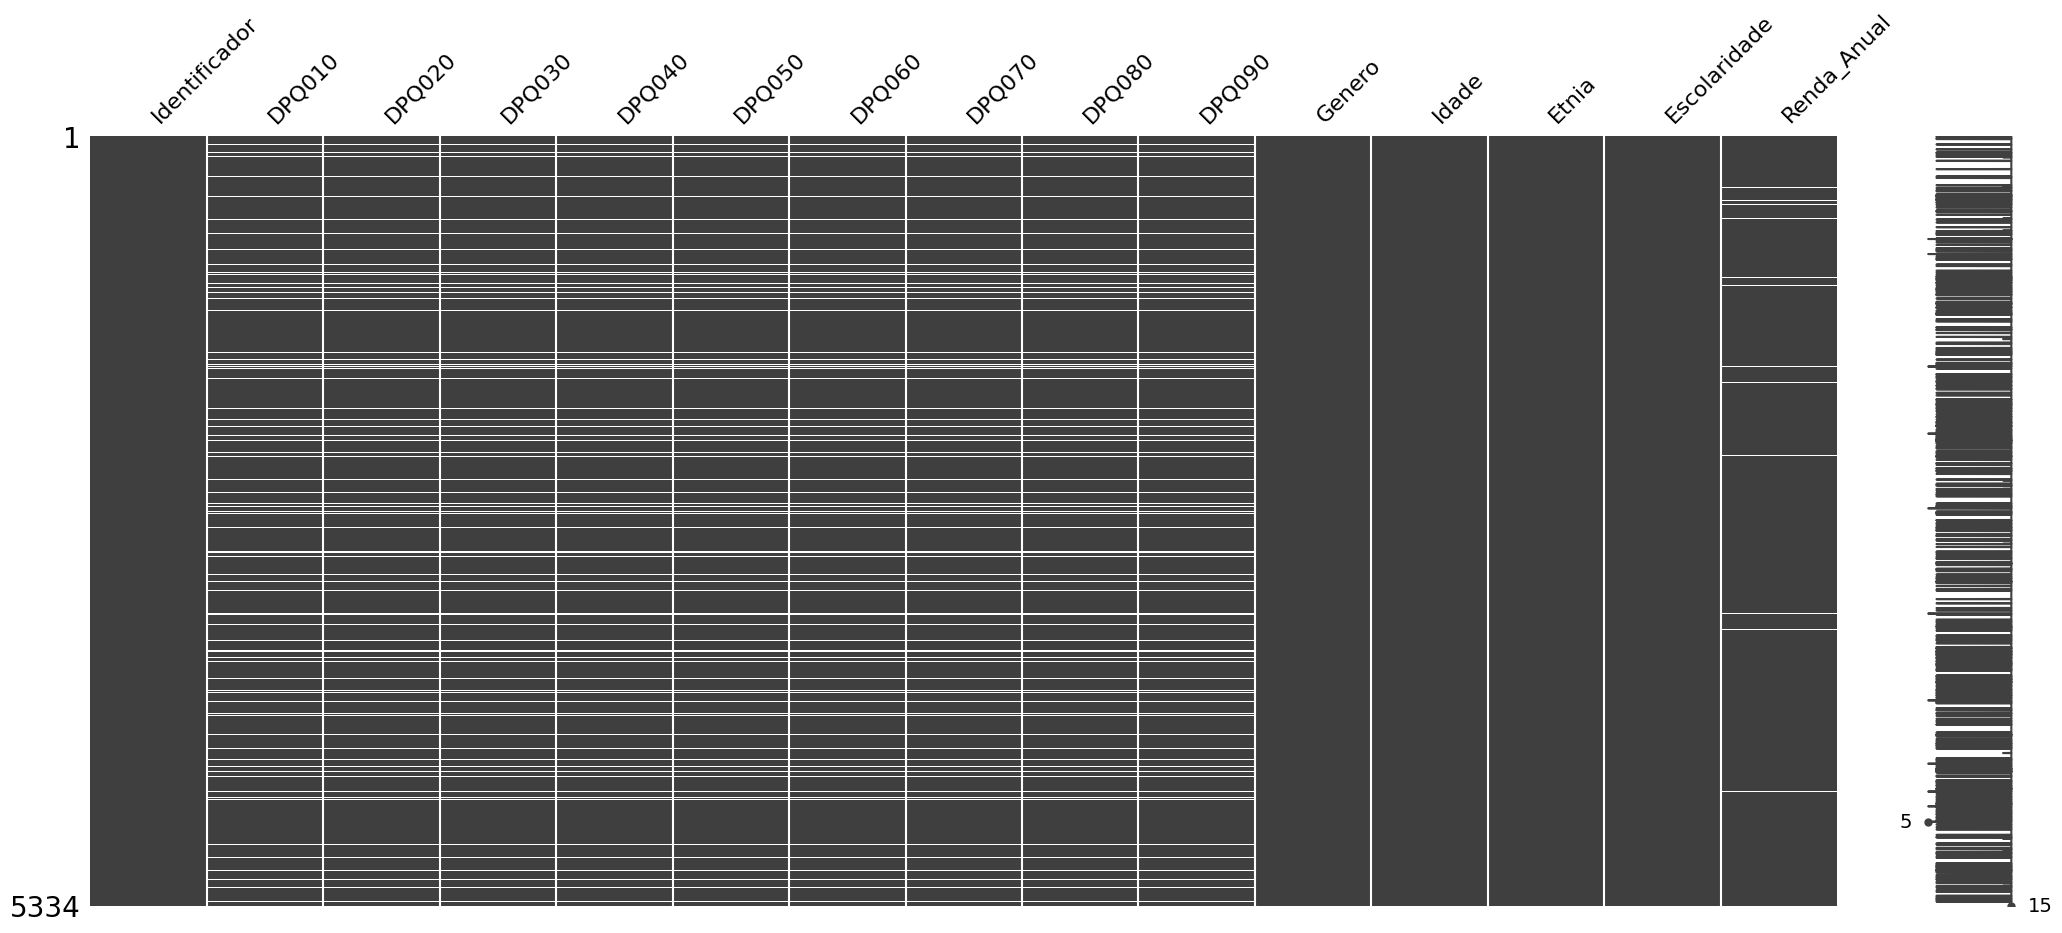

In [7]:
# VERIFICANDO ITENS NULOS NA MATRIX COMPLETA (DEMO_PHQ)

msno.matrix(df_depressao)

In [8]:
# VERIFICANDO A QUANTIDADE DE ITENS NULOS

df_depressao.isnull().sum()

Identificador      0
DPQ010           498
DPQ020           498
DPQ030           498
DPQ040           498
DPQ050           498
DPQ060           498
DPQ070           498
DPQ080           498
DPQ090           498
Genero             0
Idade              0
Etnia              0
Escolaridade       0
Renda_Anual       47
dtype: int64

In [9]:
# VERIFICANDO A QUANTIDADE DE ITENS NULOS (PORCENTAGEM)

100*df_depressao.isnull().sum().round()/df_depressao.shape[0]

Identificador    0.000000
DPQ010           9.336333
DPQ020           9.336333
DPQ030           9.336333
DPQ040           9.336333
DPQ050           9.336333
DPQ060           9.336333
DPQ070           9.336333
DPQ080           9.336333
DPQ090           9.336333
Genero           0.000000
Idade            0.000000
Etnia            0.000000
Escolaridade     0.000000
Renda_Anual      0.881140
dtype: float64

In [10]:
# VERIFICANDO A QUANTIDADE DE ITENS NULOS (PORCENTAGEM/ARREDONDANDO)

100*round(df_depressao.isnull().sum().round()/df_depressao.shape[0],4)

Identificador    0.00
DPQ010           9.34
DPQ020           9.34
DPQ030           9.34
DPQ040           9.34
DPQ050           9.34
DPQ060           9.34
DPQ070           9.34
DPQ080           9.34
DPQ090           9.34
Genero           0.00
Idade            0.00
Etnia            0.00
Escolaridade     0.00
Renda_Anual      0.88
dtype: float64

In [11]:
# TRATAMENTO DAS COLUNAS 1 A 10 QUE POSSUEM OS NÚMEROS DE RESPOSTA 7 E 9 PARA 'NAN'

df_depressao_copia = df_depressao
df_depressao_copia.iloc[:,1:10] = df_depressao_copia.iloc[:,1:10].replace({7:np.nan, 9:np.nan})

#OBS.: AS OPÇÕES "7" E "9" SÃO PESSOAS QUE NÃO SABEM OU NÃO RESPONDERAM E PARA O CENÁRIO NÃO FARÁ DIFERENÇA REMOVE-LAS

In [12]:
df_depressao_copia.isnull().sum()

Identificador      0
DPQ010           507
DPQ020           503
DPQ030           505
DPQ040           503
DPQ050           502
DPQ060           503
DPQ070           502
DPQ080           507
DPQ090           500
Genero             0
Idade              0
Etnia              0
Escolaridade       0
Renda_Anual       47
dtype: int64

In [13]:
# QUANTIDADE DE LINHAS

f'QUANTIDADE DE LINHAS: {df_depressao_copia.shape[0]}'

'QUANTIDADE DE LINHAS: 5334'

In [14]:
# QUANTIDADE DE COLUNAS

f'QUANTIDADE DE COLUNAS: {df_depressao_copia.shape[1]}'

'QUANTIDADE DE COLUNAS: 15'

In [15]:
# TRATAMENTO DAS COLUNAS DE ESCOLARIDADE SEM RESPOSTAS (COM VARIAVEL) E DE RENDA EM INTERVALOS (POR MÉDIA)

escolaridade_e_renda = {
    "Escolaridade":{7: np.nan, 9: np.nan},   
    "Renda_Anual":{
    1: np.mean([0,4999]),
    2: np.mean([5000,9999]),
    3: np.mean([10000,14999]),
    4: np.mean([15000,19999]),
    5: np.mean([20000,24999]),
    6: np.mean([25000,34999]),
    7: np.mean([35000,44999]),
    8: np.mean([45000,54999]),
    9: np.mean([55000,64999]),
    10: np.mean([65000,74999]),
    11: 75000,
    12: np.mean([20000,100000]),
    12: np.mean([0, 19999]),
    77: np.nan,
    99: np.nan}
}

In [16]:
# ADICIONADO AS VARIAVEIS TRATADAS NA BASE

df_depressao_copia = df_depressao_copia.replace(escolaridade_e_renda)

In [17]:
df_depressao_copia.describe().astype(int)

,Identificador,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Genero,Idade,Etnia,Escolaridade,Renda_Anual
count,5334,4827,4831,4829,4831,4832,4831,4832,4827,4834,5334,5334,5334,5326,5174
mean,36358,0,0,0,0,0,0,0,0,0,1,45,2,3,40051
std,2964,0,0,0,0,0,0,0,0,0,0,20,1,1,24551
min,31130,0,0,0,0,0,0,0,0,0,1,18,1,1,13
25%,33838,0,0,0,0,0,0,0,0,0,1,27,3,2,17499
50%,36347,0,0,0,0,0,0,0,0,0,2,43,3,3,39999
75%,38915,0,0,1,1,0,0,0,0,0,2,62,4,4,69999
max,41473,3,3,3,3,3,3,3,3,3,2,85,5,5,75000


In [18]:
# TRATAMENTO DAS COLUNAS DE "GENERO", "ETNIA" E "ESCOLARIDADE" PARA DADOS QUALITATIVOS

genero_e_etnia = {
    "Genero": {1:"Masculino", 2:"Feminino"},
    "Etnia": {
    1:"Branco",
    2:"Negro",
    3:"Mexicano/Americano",
    4:"Outro",
    5:"Outro/Hispânico"},
    "Escolaridade": {
    1:"Fundamental Incompleto",
    2:"Fundamental",
    3:"Ensino Médio",
    4:"Superior Incompleto",
    5:"Supeior Completo"}
}

In [19]:
df_depressao_copia = df_depressao_copia.replace(genero_e_etnia)

In [20]:
# RETORNO DA BASE TRATADA

df_depressao_copia.head(10)

,Identificador,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Genero,Idade,Etnia,Escolaridade,Renda_Anual
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feminino,85,Mexicano/Americano,Superior Incompleto,17499.5
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Feminino,44,Outro,Superior Incompleto,75000.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Masculino,70,Mexicano/Americano,Supeior Completo,75000.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Masculino,73,Mexicano/Americano,Ensino Médio,9999.5
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,Feminino,18,Negro,Ensino Médio,75000.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,Masculino,19,Mexicano/Americano,Superior Incompleto,75000.0
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Masculino,21,Negro,Ensino Médio,12499.5
7,31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Feminino,85,Mexicano/Americano,Fundamental,2499.5
8,31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Masculino,79,Mexicano/Americano,Ensino Médio,12499.5
9,31151,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,Feminino,59,Outro,Ensino Médio,39999.5


In [21]:
# DESCRIÇÃO DA ETNIA PELO GÊNERO

df_depressao_copia.groupby(['Genero'])['Etnia'].describe(percentiles = [.01, .25, .5, .75, .99])

#OBS.: USADO A FUNÇÃO "PERCENTILES" PARA DIVIDIR EM PERCENTIL

,count,unique,top,freq
Genero,,,,
Feminino,2773,5,Mexicano/Americano,1281
Masculino,2561,5,Mexicano/Americano,1235


In [22]:
# DESCRIÇÃO DA ETNIA PELA IDADE

df_depressao_copia.groupby(['Genero'])['Idade'].describe()

,count,mean,std,min,25%,50%,75%,max
Genero,,,,,,,,
Feminino,2773.0,44.065272,20.103441,18.0,26.0,41.0,60.0,85.0
Masculino,2561.0,46.199531,20.136866,18.0,28.0,44.0,63.0,85.0


In [23]:
# DESCRIÇÃO DA ETNIA PELA ESCOLARIDADE

df_depressao_copia.groupby(['Genero'])['Escolaridade'].describe()

,count,unique,top,freq
Genero,,,,
Feminino,2769,5,Superior Incompleto,823
Masculino,2557,5,Superior Incompleto,675


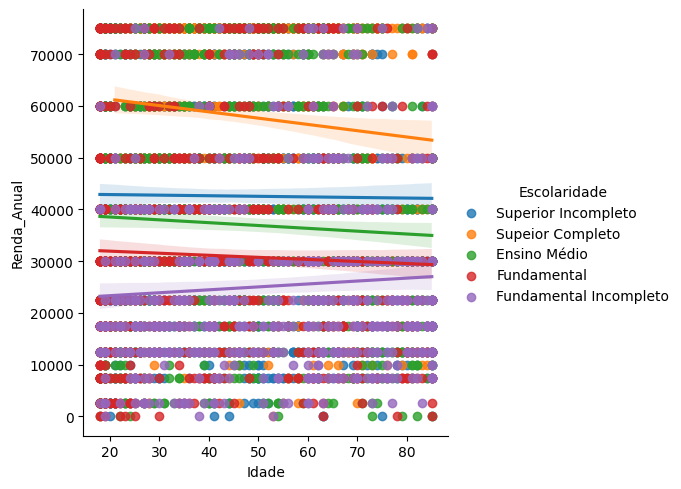

In [24]:
# GERANDO UM GRÁFICO DAS VARIAVÉIS QUE POSSUEM DADOS QUANTITATIVOS

sns.lmplot(x = 'Idade', y = 'Renda_Anual', hue = 'Escolaridade', data = df_depressao_copia)

plt.xlabel('Idade')
plt.ylabel('Renda_Anual')
plt.show()

In [25]:
# MÉTODO PARA AGRUPAR AS VARIÁVEIS

df_depressao_copia.groupby("Etnia")["Escolaridade"].unique()

Etnia
Branco                [Ensino Médio, Fundamental Incompleto, Fundame...
Mexicano/Americano    [Superior Incompleto, Supeior Completo, Ensino...
Negro                 [Ensino Médio, Fundamental, Fundamental Incomp...
Outro                 [Superior Incompleto, Ensino Médio, Fundamenta...
Outro/Hispânico       [Ensino Médio, Supeior Completo, Fundamental, ...
Name: Escolaridade, dtype: object

In [26]:
# MÉDIA DAS IDADES

f"A MEDIA DE IDADE É: {df_depressao_copia['Idade'].mean().astype(int)}"

'A MEDIA DE IDADE É: 45'

In [27]:
# SELECIONANDO LINHAS DE FORMA ALEATÓRIAS

df_depressao_copia.sample(5)

,Identificador,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Genero,Idade,Etnia,Escolaridade,Renda_Anual
3622,38214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,49,Outro,Superior Incompleto,69999.5
3657,38280,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,Masculino,54,Mexicano/Americano,Ensino Médio,29999.5
3330,37667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Masculino,65,Outro,Supeior Completo,75000.0
1271,33727,3.0,2.0,3.0,2.0,1.0,0.0,3.0,1.0,0.0,Feminino,57,Outro,Superior Incompleto,49999.5
818,32821,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Feminino,60,Mexicano/Americano,Supeior Completo,59999.5


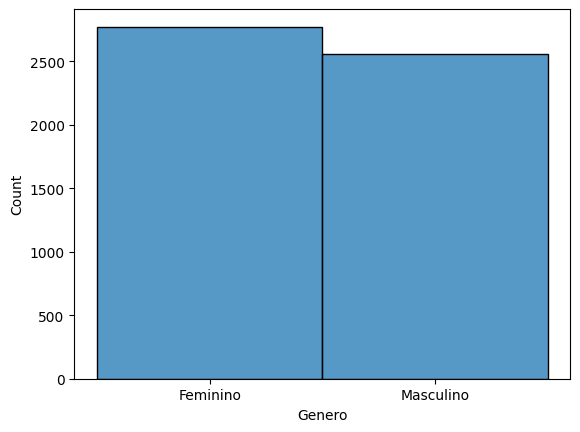

In [28]:
# GRÁFICO PELO GÊNERO

sns.histplot(data = df_depressao_copia['Genero']);

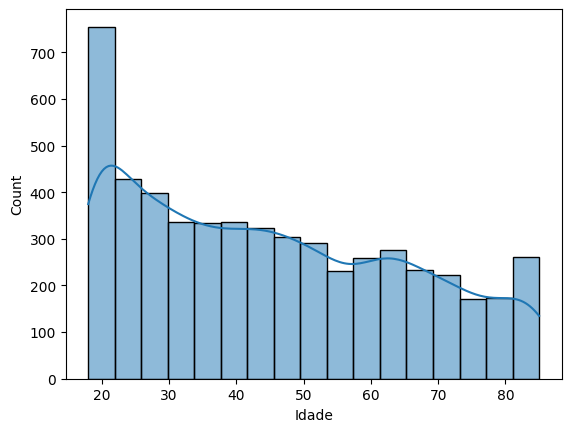

In [29]:
# GRÁFICO PELA IDADE

sns.histplot(df_depressao_copia['Idade'], kde=True);

<Axes: xlabel='Idade', ylabel='Count'>

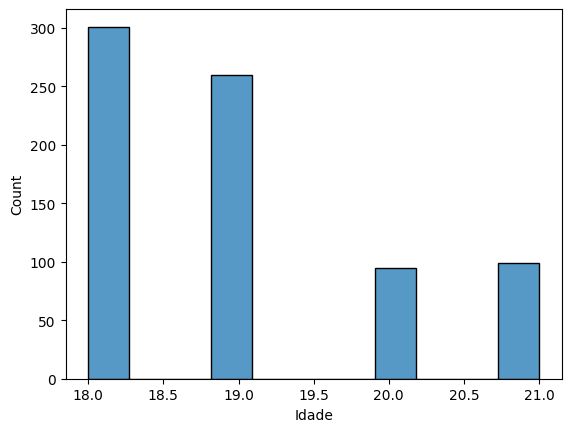

In [30]:
# # GRÁFICO PELA IDADE (MENORES DE 21)

sns.histplot(data=df_depressao_copia[df_depressao_copia.Idade <= 21], x='Idade')

# OBS.: FILTRO REALIZADO PARA DETALHAR MELHOR AS IDADES DENTRO DO MAIOR INTERVALO 

<Axes: xlabel='Etnia', ylabel='Count'>

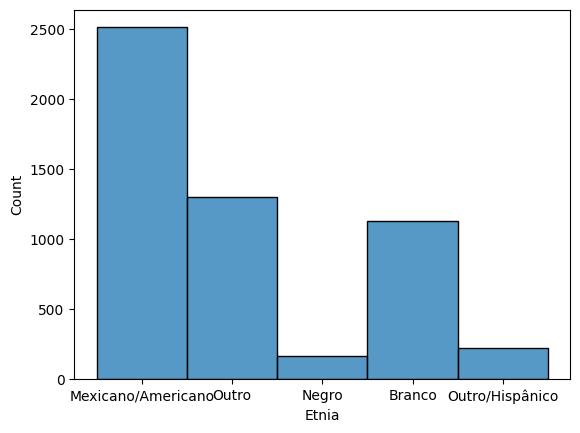

In [31]:
# GRÁFICO PELA ETNIA

sns.histplot(df_depressao_copia['Etnia'])

<Axes: xlabel='Escolaridade', ylabel='Count'>

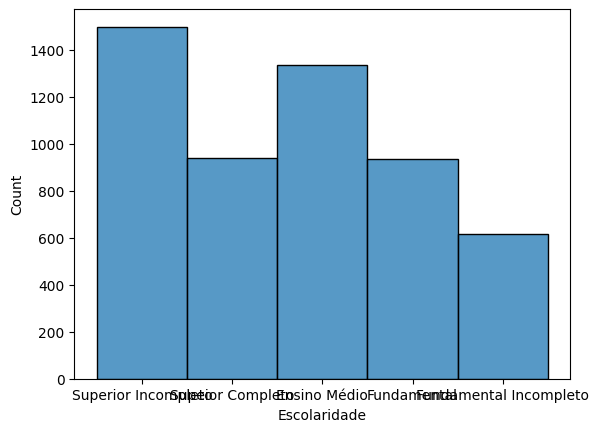

In [32]:
# GRÁFICO PELA ESCOLARIDADE

sns.histplot(df_depressao_copia['Escolaridade'],legend='Escolaridade')

<Axes: xlabel='Renda_Anual', ylabel='Count'>

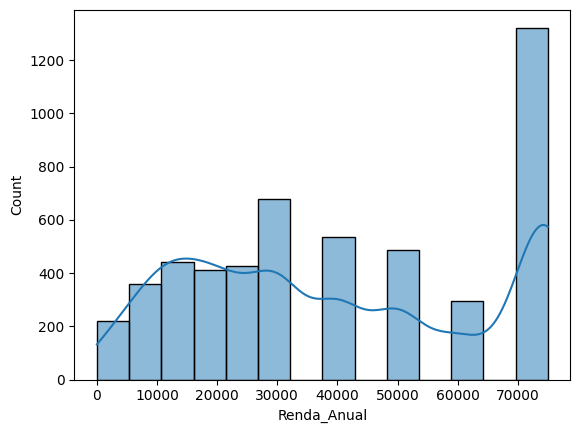

In [33]:
# GRÁFICO PELA RENDA

sns.histplot(df_depressao_copia['Renda_Anual'], kde=True)

<Axes: xlabel='Renda_Anual', ylabel='Count'>

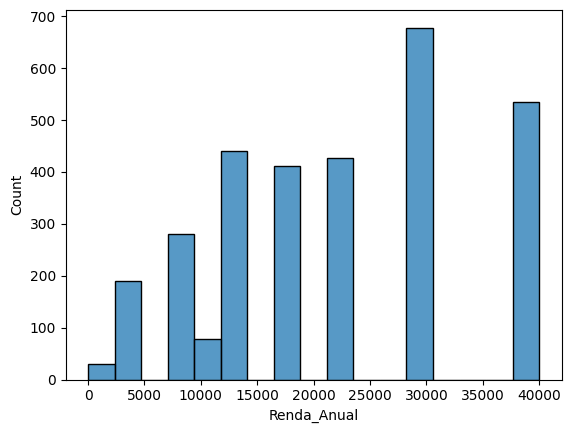

In [34]:
# GRÁFICO PELA RENDA (USANDO FILTRO)

sns.histplot(data=df_depressao_copia[df_depressao_copia.Renda_Anual <= 40000], x='Renda_Anual')

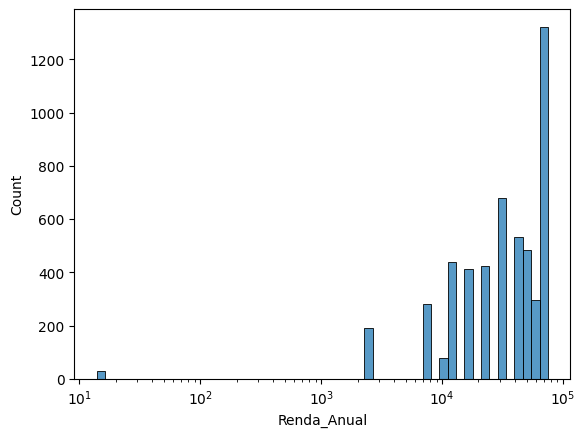

In [35]:
# GRÁFICO PELA RENDA - TRANSFORMAÇÃO LOGARÍTMICA

fig, ax = plt.subplots()
ax.set(xscale="log")
sns.histplot(data=df_depressao_copia.Renda_Anual, x=(df_depressao_copia.Renda_Anual+1))
plt.show()

# **INICIANDO OS TRATAMENTOS DA BASE DE DADOS (PAG_HEI)**

In [36]:
# DADOS SOBRE A BASE (PAG_HEI)

df_heathly_habits.head(5)

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [37]:
# INFORMAÇÕES SOBRE A BASE (PAG_HEI)

df_heathly_habits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [38]:
# RENOMEANDO A BASE DE DADOS (PAG_HEI)

df_habitos = df_heathly_habits.rename(columns={ 'SEQN':'Identificador','PAG_MINW':'Tempo_Atividade','ADHERENCE':'Grupo_Aderencia',
                                                'HEI2015C1_TOTALVEG':'Total_Vegetais','HEI2015C2_GREEN_AND_BEAN':'Verduras_Legumes',
                                                'HEI2015C3_TOTALFRUIT':'Total_Frutas','HEI2015C4_WHOLEFRUIT':'Frutas_InNatura',
                                                'HEI2015C5_WHOLEGRAIN':'Graos_Integrais','HEI2015C6_TOTALDAIRY':'Laticinios',
                                                'HEI2015C7_TOTPROT':'Proteinas','HEI2015C8_SEAPLANT_PROT':'PlatasMarinhas_ProteinasVegetais',
                                                'HEI2015C9_FATTYACID':'Acido_Graxo','HEI2015C10_SODIUM':'Sodio','HEI2015C11_REFINEDGRAIN':'Graos_Refinados',
                                                'HEI2015C12_SFAT':'Gordura_Saturada','HEI2015C13_ADDSUG':'Acucares_Adicionais','HEI2015_TOTAL_SCORE':'Escore_Total'})

In [39]:
# TRATAMENTO DA COLUNA DE ADERENCIA AS ATIVIDADES

aderencia = {"Grupo_Aderencia": {1:"Baixo", 2:"Adequado", 3:"Alto"}}

df_habitos = df_habitos.replace(aderencia)

In [40]:
df_habitos.head(5)

,Identificador,Tempo_Atividade,Grupo_Aderencia,Total_Vegetais,Verduras_Legumes,Total_Frutas,Frutas_InNatura,Graos_Integrais,Laticinios,Proteinas,PlatasMarinhas_ProteinasVegetais,Acido_Graxo,Sodio,Graos_Refinados,Gordura_Saturada,Acucares_Adicionais,Escore_Total
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,Adequado,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,Baixo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,Adequado,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,Alto,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [41]:
# UNINDO AS BASES PELO COMANDO "MERGE" 

df_completo = df_depressao_copia.merge(df_habitos, on = 'Identificador', how = 'left')

# OBS.: TIPOS DE JOIN (INNER, LEFT. RIGHT, FULL OUTER) 

In [42]:
# INFORMAÇÕES SOBRE A UNIÃO DAS BASES (DEMO_PHQ E PAG_HEI)

df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Identificador                     5334 non-null   int64  
 1   DPQ010                            4827 non-null   float64
 2   DPQ020                            4831 non-null   float64
 3   DPQ030                            4829 non-null   float64
 4   DPQ040                            4831 non-null   float64
 5   DPQ050                            4832 non-null   float64
 6   DPQ060                            4831 non-null   float64
 7   DPQ070                            4832 non-null   float64
 8   DPQ080                            4827 non-null   float64
 9   DPQ090                            4834 non-null   float64
 10  Genero                            5334 non-null   object 
 11  Idade                             5334 non-null   int64  
 12  Etnia 

In [43]:
# RETORNANDO OS CAMPOS NULOS DE FORMA DESCRESCENTE PELO COMANDO "SORT_VALUES"

df_completo.isnull().sum().sort_values(ascending=False) 

DPQ080                              507
DPQ010                              507
DPQ030                              505
DPQ020                              503
DPQ040                              503
DPQ060                              503
DPQ050                              502
DPQ070                              502
DPQ090                              500
Graos_Integrais                     274
Total_Frutas                        274
Frutas_InNatura                     274
Escore_Total                        274
Laticinios                          274
Proteinas                           274
Total_Vegetais                      274
Verduras_Legumes                    274
Graos_Refinados                     274
Sodio                               274
Acido_Graxo                         274
Gordura_Saturada                    274
Acucares_Adicionais                 274
PlatasMarinhas_ProteinasVegetais    274
Renda_Anual                         160
Escolaridade                          8


In [44]:
df_completo.shape

(5334, 31)

In [45]:
F'QUANTIDADE DE COLUNAS APÓS UNIÃO DAS BASES: {df_completo.shape[0]}'

'QUANTIDADE DE COLUNAS APÓS UNIÃO DAS BASES: 5334'

In [46]:

F'QUANTIDADE DE COLUNAS APÓS UNIÃO DAS BASES: {df_completo.shape[1]}'

'QUANTIDADE DE COLUNAS APÓS UNIÃO DAS BASES: 31'

In [47]:
# RETORNANDO AS VARIAVEIS DE FORMA DECRESCENTE PELO COMANDO "SORT_VALUES" E COM "PORCENTAGEM"

100* round(df_completo.isnull().sum().sort_values(ascending=False)/df_completo.shape[0],4)

# OBS.: ATÉ 10% DE VALORES AUSENTES PODERÁ SER ACEITÁVEL, SE POSSUIR PORCETAGEM MAIOR PODEMOS ESTUDAR RETIRAR A VARIÁVEL.

DPQ080                              9.51
DPQ010                              9.51
DPQ030                              9.47
DPQ020                              9.43
DPQ040                              9.43
DPQ060                              9.43
DPQ050                              9.41
DPQ070                              9.41
DPQ090                              9.37
Graos_Integrais                     5.14
Total_Frutas                        5.14
Frutas_InNatura                     5.14
Escore_Total                        5.14
Laticinios                          5.14
Proteinas                           5.14
Total_Vegetais                      5.14
Verduras_Legumes                    5.14
Graos_Refinados                     5.14
Sodio                               5.14
Acido_Graxo                         5.14
Gordura_Saturada                    5.14
Acucares_Adicionais                 5.14
PlatasMarinhas_ProteinasVegetais    5.14
Renda_Anual                         3.00
Escolaridade    

In [48]:
# REALIZANDO A CRIAÇÃO DA VARIÁVEL DE "ESCORE" PARA CLASSIFICAR OS NÍVEIS DE DEPRESSÃO

df_completo['PHQ9'] = df_completo.iloc[:, 1:10].sum(axis = 1, skipna = False) # PODERIA USAR "COLUMNS" NO AXIS TAMBÉM

# OBS.: A FUNÇÃO "SKIPNA" É USADA PARA NÃO PULAR UM VALOR "NAN", OU SEJA, O RESULTADO DESSAS SOMAS SERÃO "NAN"

In [49]:
# OS NÍVEIS DE CLASSIFICAÇÃO "COM" OU "SEM" DEPRESSÃO DARÁ PELO PONTUAÇÃO QUE VAI DE "0" A "27"

df_completo['PHQ9'].describe().round().astype(int)

count    4799
mean        3
std         4
min         0
25%         0
50%         1
75%         4
max        27
Name: PHQ9, dtype: int64

In [50]:
# INFORMAÇÕES DA TABELA COM A NOVA COLUNA DE "ESCORE" ADICIONADA 

df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Identificador                     5334 non-null   int64  
 1   DPQ010                            4827 non-null   float64
 2   DPQ020                            4831 non-null   float64
 3   DPQ030                            4829 non-null   float64
 4   DPQ040                            4831 non-null   float64
 5   DPQ050                            4832 non-null   float64
 6   DPQ060                            4831 non-null   float64
 7   DPQ070                            4832 non-null   float64
 8   DPQ080                            4827 non-null   float64
 9   DPQ090                            4834 non-null   float64
 10  Genero                            5334 non-null   object 
 11  Idade                             5334 non-null   int64  
 12  Etnia 

In [51]:
# CRIANDO A CONDIÇÃO DAS VARIAVEIS PARA CLASSIFICAR O NÍVEL DE ACORDO COM A PESQUISA

condicoes_nivel = [
    (df_completo['PHQ9'].isna()), 
    (df_completo['PHQ9'] < 5), 
    (df_completo['PHQ9'] >= 5) & (df_completo['PHQ9'] <= 9),
    (df_completo['PHQ9'] > 9) & (df_completo['PHQ9'] <= 14),
    (df_completo['PHQ9'] > 14) & (df_completo['PHQ9'] <= 19),
    (df_completo['PHQ9'] > 19)]

classificacao = [np.nan, 0, 1, 2, 3, 4]

#OBS.: 0 - SEM SINTOMAS | 1 - SINTOMAS LEVES | 2 - SINTOMAS MODERADOS | 3 - SINTOMAS MODERADAMENTE SEVEROS | 4 - SINTOMAS SEVEROS 

In [52]:
# CRIANDO A TABELA "PHP_GRUPO" PARA AGRUPAR OS NÍVEIS E CLASSIFICAÇÃO

df_completo['PHP_GRUPO'] = np.select(condicoes_nivel,classificacao)

In [53]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Identificador                     5334 non-null   int64  
 1   DPQ010                            4827 non-null   float64
 2   DPQ020                            4831 non-null   float64
 3   DPQ030                            4829 non-null   float64
 4   DPQ040                            4831 non-null   float64
 5   DPQ050                            4832 non-null   float64
 6   DPQ060                            4831 non-null   float64
 7   DPQ070                            4832 non-null   float64
 8   DPQ080                            4827 non-null   float64
 9   DPQ090                            4834 non-null   float64
 10  Genero                            5334 non-null   object 
 11  Idade                             5334 non-null   int64  
 12  Etnia 

In [54]:
df_completo.head(5)

,Identificador,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,Proteinas,PlatasMarinhas_ProteinasVegetais,Acido_Graxo,Sodio,Graos_Refinados,Gordura_Saturada,Acucares_Adicionais,Escore_Total,PHQ9,PHP_GRUPO
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0.0


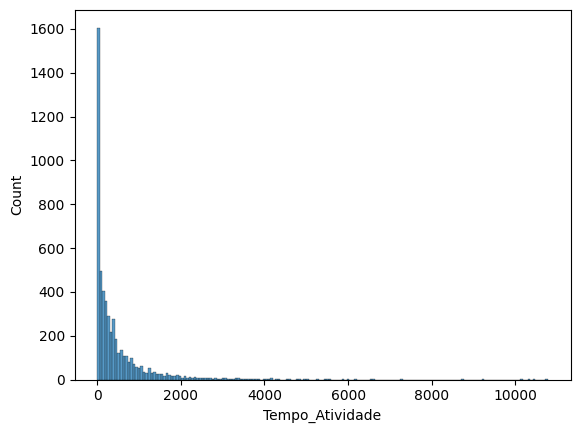

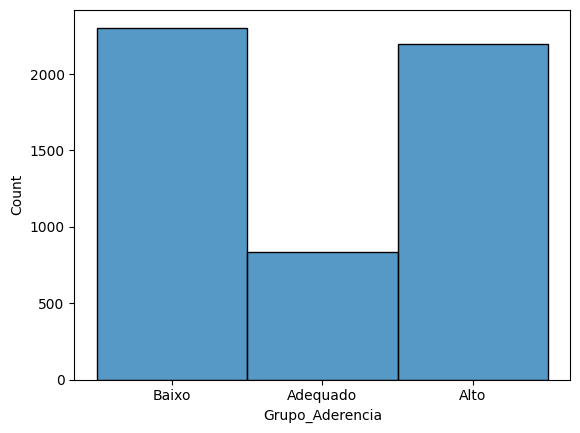

In [55]:
# GRÁFICO DAS VARIAVÉIS DE TEMPO E ADERENCIA EM ATIVIDADE FISICAS

for itens in df_completo.columns[15:17]:  
  sns.histplot(df_completo[itens])
  plt.show()

In [56]:
# TRATAMENTO DA VARIAVÉL DE "TEMPO_ATIVIDADE" PARA OS DEVIDOS PADRÕES

df_completo['Tempo_Atividade_Trunc'] = np.where(df_completo['Tempo_Atividade'] > 3600, 3600, df_completo['Tempo_Atividade'])

#OBS.: POSSUÍMOS APENAS 160 HORAS NA SEMANA ENTÃO É IMPOSSÍVEL ALGUÉM FAZER 10777MIN, VAMOS TRUNCAR O TEMPO MÁXIMO EM 60 HORAS SEMANAIS QUE EQUIVALE A 3600MIN

In [57]:
# COMPARAÇÃO DOS VALORES APÓS TRATATIVA

df_completo[['Tempo_Atividade_Trunc','Tempo_Atividade']].describe().round()

,Tempo_Atividade_Trunc,Tempo_Atividade
count,5334.0,5334.0
mean,455.0,472.0
std,663.0,780.0
min,0.0,0.0
25%,35.0,35.0
50%,210.0,210.0
75%,569.0,569.0
max,3600.0,10778.0


In [58]:
# TRANSFORMANDO OS MINUTOS EM HORAS E ADICIONANDO O SET

df_completo['Tempo_Atividade_H'] = df_completo['Tempo_Atividade_Trunc']/60

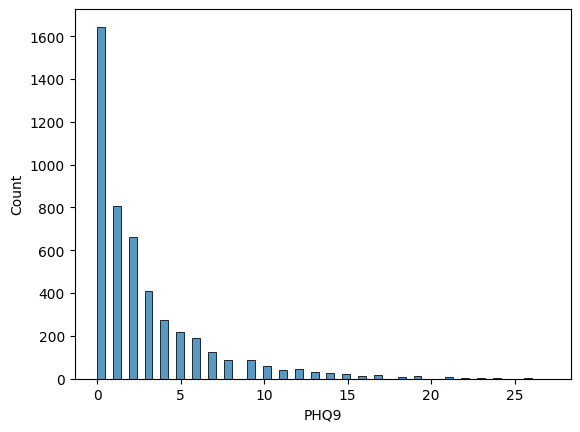

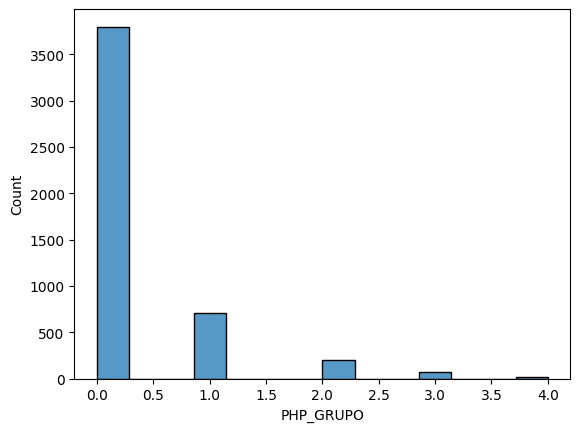

In [59]:
# GRÁFICO DAS VARIAVÉIS CRIADAS

for itens in df_completo.columns[31:33]:  
  sns.histplot(df_completo[itens])
  plt.show()

In [60]:
# ANALISANDO A FREQUENCIA

df_completo['PHP_GRUPO'].value_counts(sort = False)

0.0    3796
1.0     706
2.0     201
3.0      73
4.0      23
Name: PHP_GRUPO, dtype: int64

In [ ]:
# SALVANDO A BASE TRATADA EM UM NOVO ARQUIVO

# df_completo.to_csv('base_tratada.csv')

In [61]:
# CRIANDO UM DATAFRAME ALTERNATIVO PARA AGRUPAR AS OS VALORES DE "2" A "4" DEVIDO A QUANTIDADE BAIXA DE REGISTROS

df_completo_copia = df_completo

In [62]:
df_completo_copia['PHP_GRUPO'] = df_completo_copia['PHP_GRUPO'].replace([3,4],2)
df_completo_copia['PHP_GRUPO'].value_counts(sort = False)

0.0    3796
1.0     706
2.0     297
Name: PHP_GRUPO, dtype: int64

In [63]:
# INDICANDO AS INFORMAÇÕES QUALITATIVAS PARA OS VALORES DOS SINTOMAS

classificacao_sintomas = {"PHP_GRUPO":{
    0:'Sem Sintomas',
    1:'Sintomas Leves',
    2:'Sintomas Moderados/Moderados Severos/Severos'
}}

#OBS.: 0 - SEM SINTOMAS | 1 - SINTOMAS LEVES | 2 - SINTOMAS MODERADOS | 3 - SINTOMAS MODERADAMENTE SEVEROS | 4 - SINTOMAS SEVEROS 

In [64]:
df_completo_copia = df_completo_copia.replace(classificacao_sintomas)

In [65]:
df_completo_copia.head(5)

,Identificador,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,Acido_Graxo,Sodio,Graos_Refinados,Gordura_Saturada,Acucares_Adicionais,Escore_Total,PHQ9,PHP_GRUPO,Tempo_Atividade_Trunc,Tempo_Atividade_H
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem Sintomas,264.711316,4.411855
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem Sintomas,1353.348730,22.555812
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem Sintomas,1011.478060,16.857968
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem Sintomas,1729.145497,28.819092


In [66]:
# SEPARANDO E CRIANDO UMA LISTA DAS VARIAVÉIS CATEGORICAS QUANTITATIVAS (MAIS IMPORTANTES) E QUALITATIVAS

variaveis_quanti = ["Idade","Tempo_Atividade_H","Escore_Total"]

variaveis_quali = ["Genero","Etnia","Escolaridade","Grupo_Aderencia","PHP_GRUPO"]

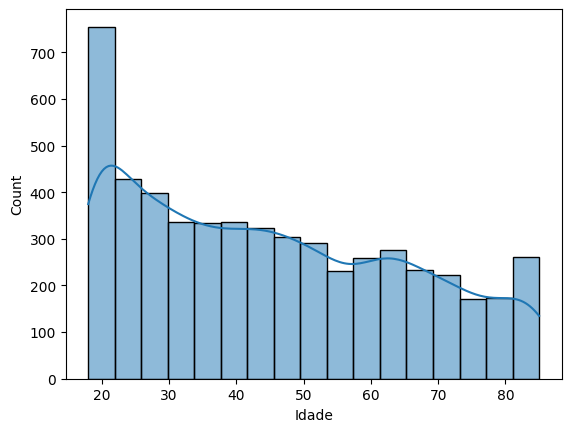

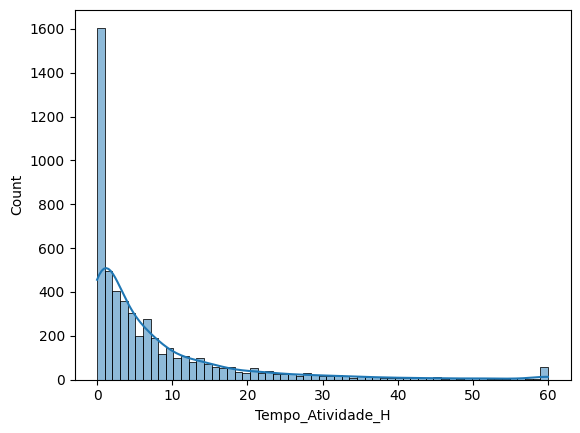

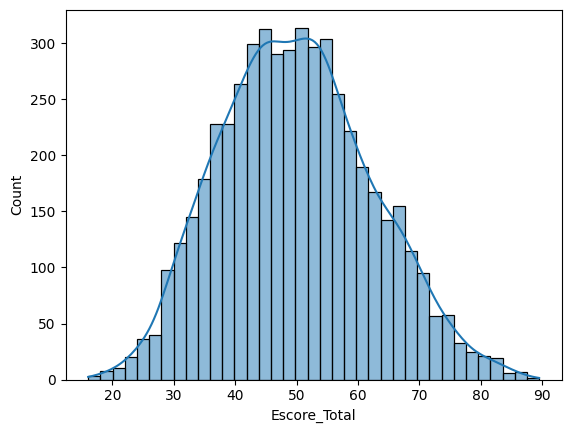

In [67]:
# GRÁFICO DAS VARIAVEIS QUANTITATIVAS 

for itens2 in variaveis_quanti:
  sns.histplot(df_completo_copia[itens2],kde=True)
  plt.xlabel(itens2)
  plt.show()

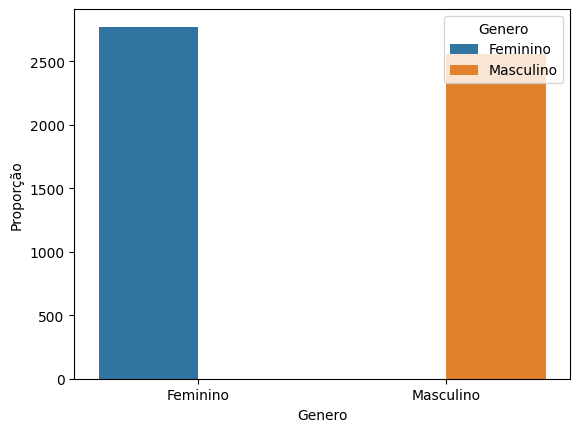

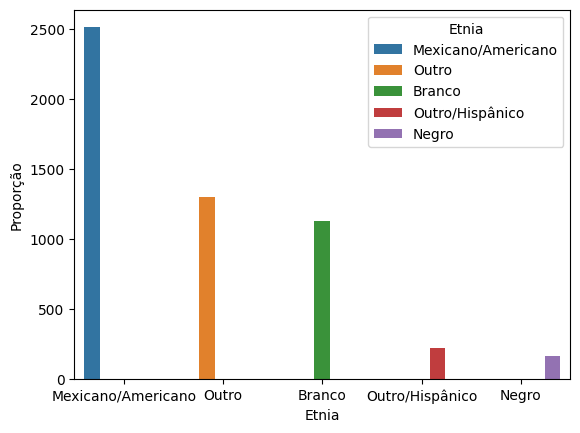

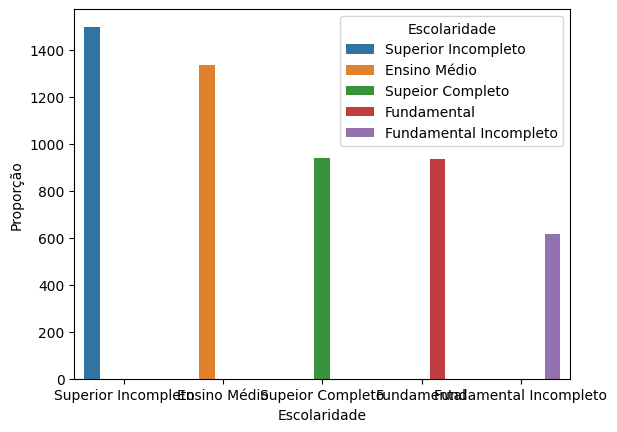

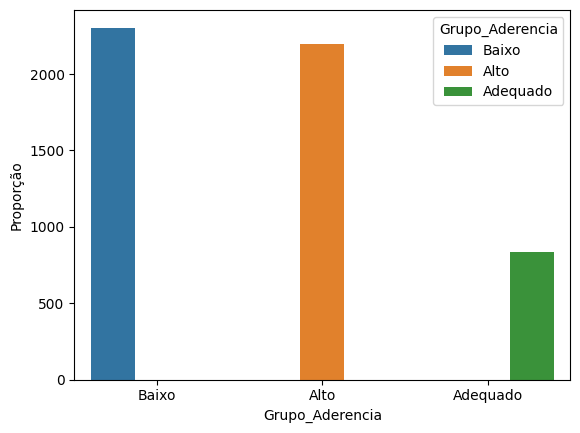

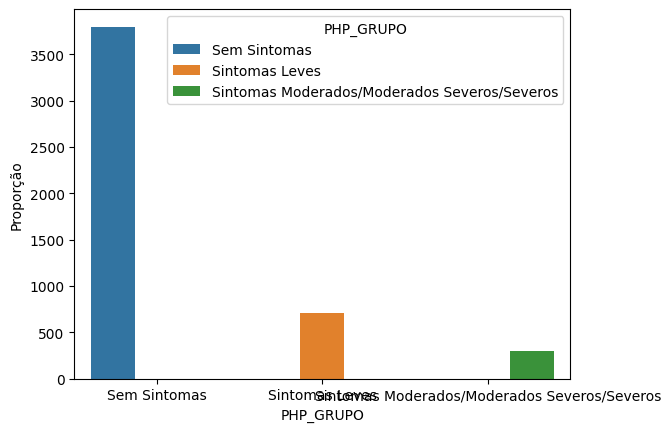

In [68]:
# GRÁFICO DAS VARIAVEIS QUALITATIVAS 

for itens3 in variaveis_quali:
  (df_completo_copia[[itens3]]
    .value_counts(normalize = False, sort = True)
    .rename("Proporção")
    .reset_index()
    .pipe((sns.barplot, "data"), x=itens3, y="Proporção",hue = itens3))
  #plt.xlim(0,1)
  plt.show()

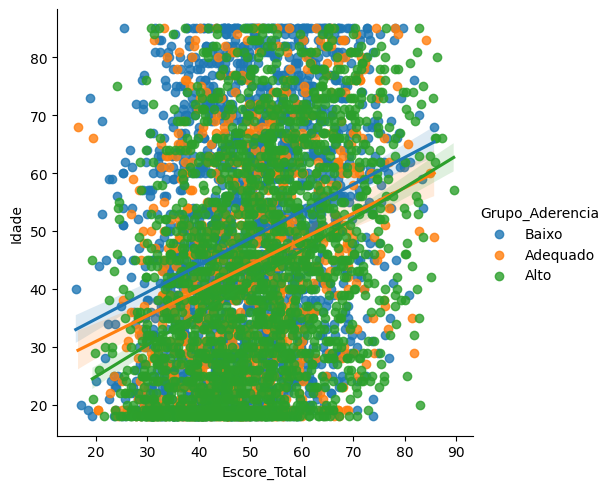

In [69]:
sns.lmplot(x = 'Escore_Total', y = 'Idade', hue = 'Grupo_Aderencia', data = df_completo_copia)
plt.xlabel('Escore_Total')
plt.ylabel('Idade')
plt.show()

In [70]:
# MEDIDA DESCRITIVA DAS VARIAVEIS NUMERICAS PELO GRUPO

from IPython.display import display

for var in variaveis_quanti:
    display(df_completo_copia[['PHP_GRUPO', var]].groupby('PHP_GRUPO').describe().round(2))

Idade                      \
                                               count   mean    std   min   
PHP_GRUPO                                                                  
Sem Sintomas                                  3796.0  45.11  20.01  18.0   
Sintomas Leves                                 706.0  43.19  19.61  18.0   
Sintomas Moderados/Moderados Severos/Severos   297.0  44.18  17.56  18.0   

                                                                      
                                               25%   50%   75%   max  
PHP_GRUPO                                                             
Sem Sintomas                                  27.0  43.0  62.0  85.0  
Sintomas Leves                                25.0  40.0  58.0  85.0  
Sintomas Moderados/Moderados Severos/Severos  29.0  45.0  56.0  85.0

Tempo_Atividade_H               \
                                                         count  mean    std   
PHP_GRUPO                                                                     
Sem Sintomas                                            3796.0  8.09  11.18   
Sintomas Leves                                           706.0  7.39  11.63   
Sintomas Moderados/Moderados Severos/Severos             297.0  4.74   9.08   

                                                                            
                                              min   25%   50%    75%   max  
PHP_GRUPO                                                                   
Sem Sintomas                                  0.0  0.92  3.96  10.39  60.0  
Sintomas Leves                                0.0  0.50  3.12   8.37  60.0  
Sintomas Moderados/Moderados Severos/Severos  0.0  0.00  1.50   5.39  60.0

Escore_Total                \
                                                    count   mean    std   
PHP_GRUPO                                                                 
Sem Sintomas                                       3729.0  50.25  12.44   
Sintomas Leves                                      687.0  48.97  11.97   
Sintomas Moderados/Moderados Severos/Severos        288.0  47.59  11.50   

                                                                          \
                                                min    25%    50%    75%   
PHP_GRUPO                                                                  
Sem Sintomas                                  16.06  41.20  49.88  58.55   
Sintomas Leves                                16.49  40.51  48.43  56.78   
Sintomas Moderados/Moderados Severos/Severos  21.63  39.11  46.50  55.95   

                                                     
                                                max  
PHP_GRUPO                                            
Sem Sintomas                                  89.53  
Sintomas Leves                                82.95  
Sintomas Moderados/Moderados Severos/Severos  83.30

In [71]:
# RETIRANDO A VARIAVEÇ GRUPO PARA NOVAS ANALISES

variaveis_quanti = ["Idade","Tempo_Atividade_H","Escore_Total"]

variaveis_quali = ["Genero","Etnia","Escolaridade","Grupo_Aderencia"]

In [72]:
# GRÁFICO BOXPLOT DAS VARIAVEIS NUMERICAS PELO GRUPO (RETIRADO)

def grafico_boxplot_grp(dataframe, variavel, medida):
    if medida == "": medida = variavel
    sns.boxplot(x="PHP_GRUPO", y=variavel, data=dataframe.replace({'PHP_GRUPO': {0: "Sem Sintomas", 
                                                                          1: "Sintomas Leves",
                                                                          2: "Sintomas Moderados e Graves"}}))
    plt.ylabel(medida)
    plt.show()

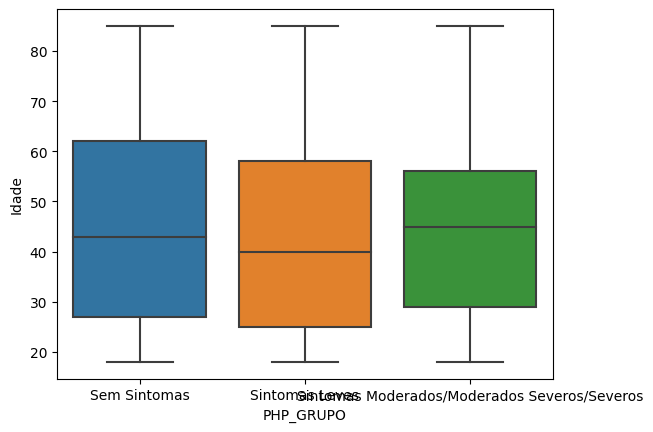

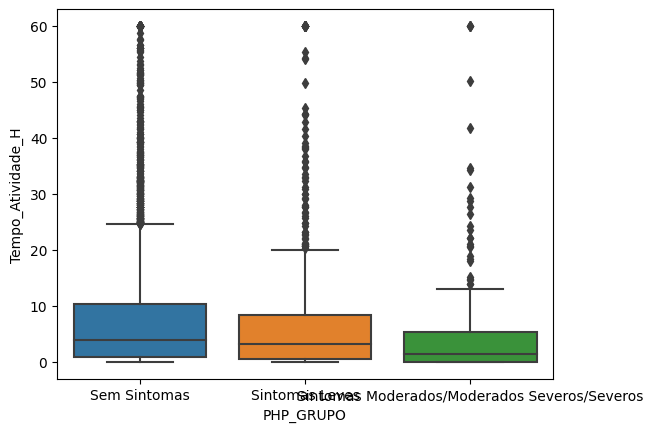

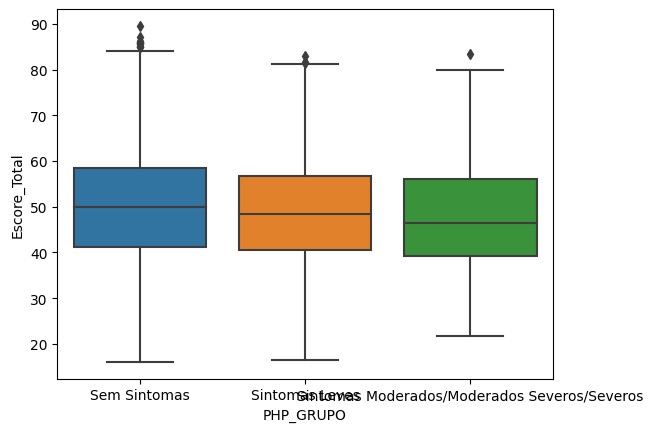

In [73]:
for itens4 in variaveis_quanti:
    grafico_boxplot_grp(df_completo_copia, itens4, "")

In [129]:
# GRÁFICO DE BARRAS DAS VARIAVEIS CATEGORICAS PELO GRUPO (RETIRADO)

def grafico_barras_prop_grp(dataframe, variavel):
    (dataframe
     .groupby(variavel)['PHP_GRUPO']
     .value_counts(normalize = False, sort = False)
     .rename("Proporção")
     .reset_index()
     .pipe((sns.catplot, "data"), x=variavel, y="Proporção", hue = 'PHP_GRUPO', kind="bar"))
    #plt.ylim(0,1)
    plt.show()

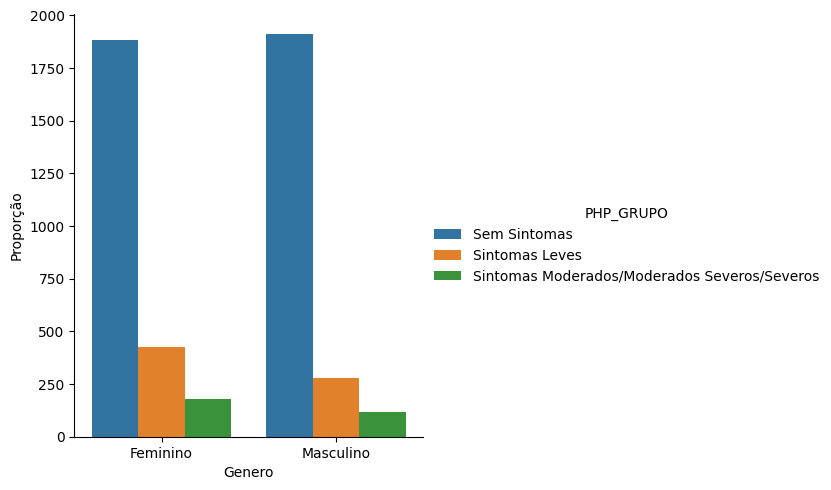

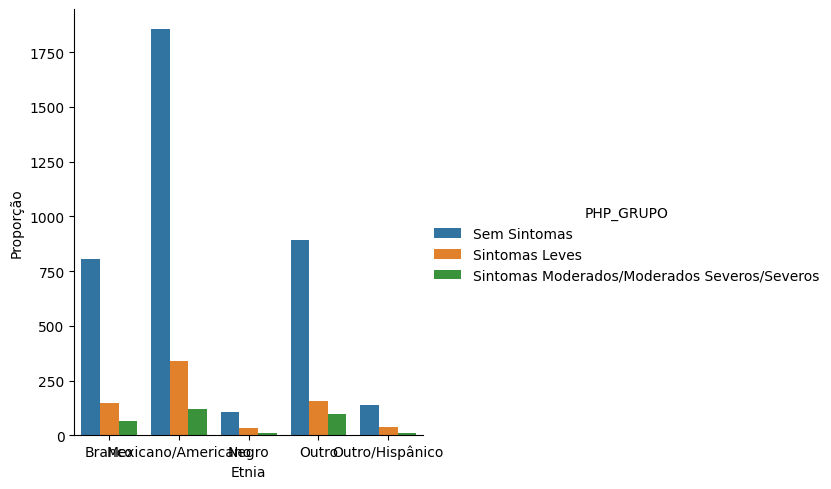

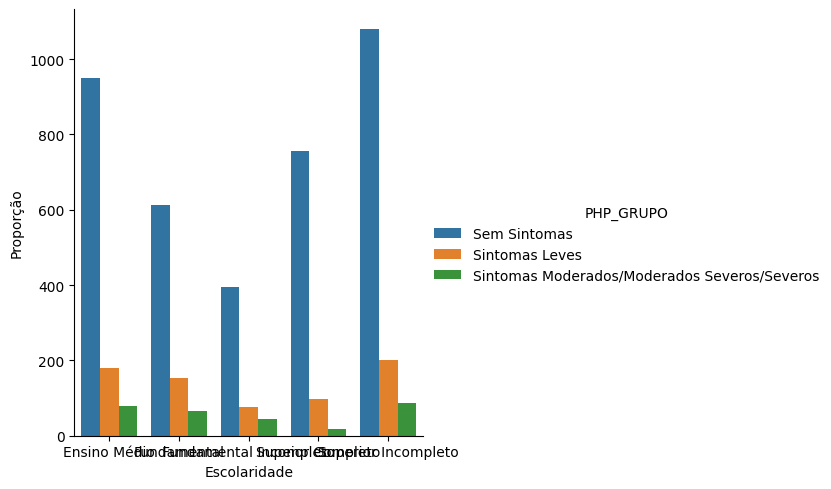

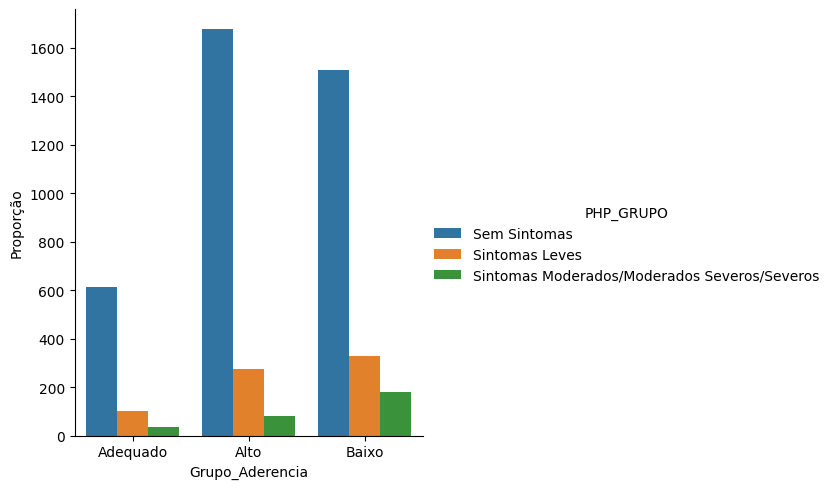

In [130]:
for itens5 in variaveis_quali:
    grafico_barras_prop_grp(df_completo_copia, itens5)

In [76]:
# COMPARAÇÃO DAS VARIAVEIS CATEGORICAS DE "GERERO" EM PORCENTAGEM

100* pd.crosstab(df_completo_copia['Genero'],df_completo_copia['PHP_GRUPO'], normalize='index').round(4)

PHP_GRUPO,Sem Sintomas,Sintomas Leves,Sintomas Moderados/Moderados Severos/Severos
Genero,,,
Feminino,75.71,17.13,7.16
Masculino,82.74,12.11,5.15


In [77]:
# COMPARAÇÃO DAS VARIAVEIS CATEGORICAS DE "GERERO" EM NUMEROS

crosstab = pd.crosstab(df_completo_copia['Genero'],df_completo_copia['PHP_GRUPO'])
crosstab

PHP_GRUPO,Sem Sintomas,Sintomas Leves,Sintomas Moderados/Moderados Severos/Severos
Genero,,,
Feminino,1883,426,178
Masculino,1913,280,119


In [78]:
# COMPARAÇÃO DAS VARIAVEIS CATEGORICAS DE "GERERO" USANDO O TESTE DE HIPOTESE QUI-QUADRADO

stat, p, df, expected = chi2_contingency(crosstab)
print('stat = %.3f, p = %.3f' % (stat, p))

# HIPOTESE "ALTERNATIVA" POSSUI ASSOCIAÇÃO

stat = 35.816, p = 0.000


### O valor de p foi menor que 0.05 e neste caso ficaremos com a hipotese "Alternativa" indicando que existe associação entre os generos, sendo o sintomas de depressão maior nas mulheres. 

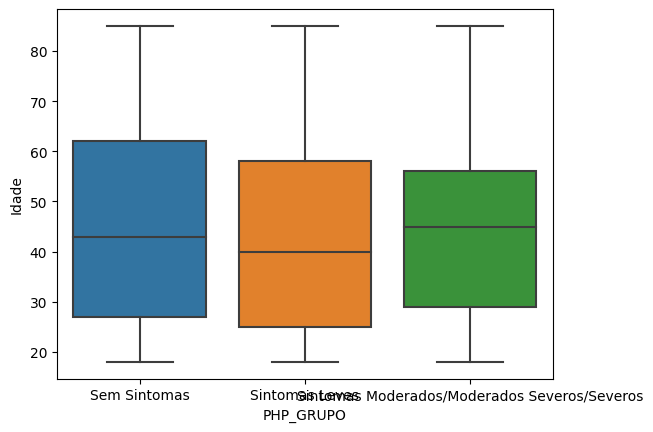

In [79]:
# COMPARAÇÃO EM BOXPLOT DA MÉDIA DE IDADE

grafico_boxplot_grp(df_completo_copia, "Idade", "Idade")

In [80]:
# APLICANDO O TESTE DE HIPOTESE "ANOVA" PARA COMPARAR AS MÉDIAS DE IDADE POR GRUPOS INDEPENDENTES


df_completo_copia_aux = df_completo_copia[["PHP_GRUPO", "Idade"]]

stat, p = f_oneway(df_completo_copia_aux[(df_completo_copia_aux.PHP_GRUPO == "Sem Sintomas")]["Idade"],
                   df_completo_copia_aux[(df_completo_copia_aux.PHP_GRUPO == "Sintomas Leves")]["Idade"],
                   df_completo_copia_aux[(df_completo_copia_aux.PHP_GRUPO == "Sintomas Moderados/Moderados Severos/Severos")]["Idade"])

print('stat = %.3f, p = %.3f' % (stat, p))

# HIPOTESE "NULA" NÃO POSSUI ASSOCIAÇÃO

stat = 2.935, p = 0.053


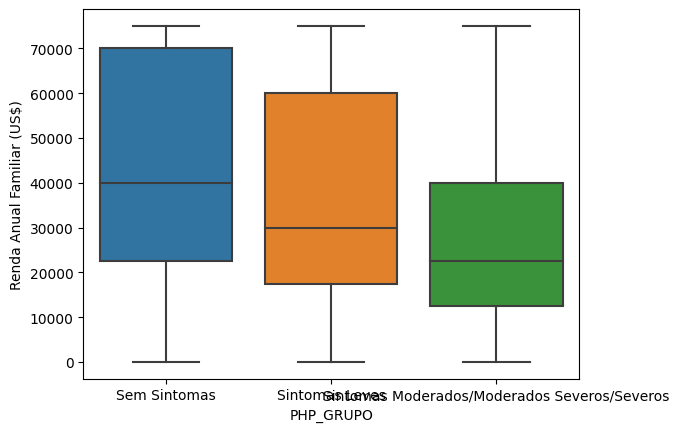

In [81]:
# COMPARAÇÃO EM BOXPLOT DA RENDA FAMILIAR ANUAL

grafico_boxplot_grp(df_completo_copia, "Renda_Anual", "Renda Anual Familiar (US$)")

In [82]:
# APLICANDO O TESTE DE HIPOTESE "ANOVA" PARA COMPARAR A RENDA FAMILIAR ANUAL

df_completo_copia_aux2 = df_completo_copia[["PHP_GRUPO", "Renda_Anual"]].dropna()

stat, p = f_oneway(df_completo_copia_aux2[(df_completo_copia_aux2.PHP_GRUPO == "Sem Sintomas")]["Renda_Anual"],
                   df_completo_copia_aux2[(df_completo_copia_aux2.PHP_GRUPO == "Sintomas Leves")]["Renda_Anual"],
                   df_completo_copia_aux2[(df_completo_copia_aux2.PHP_GRUPO == "Sintomas Moderados/Moderados Severos/Severos")]["Renda_Anual"])

print('stat=%.3f, p=%.3f' % (stat, p))

# HIPOTESE "ALTERNATIVA" POSSUI ASSOCIAÇÃO

stat=47.153, p=0.000


### O valor de p foi menor que 0.05 e neste caso ficaremos com a hipotese "Alternativa" indicando que existe associação entre nível de renda.

In [83]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

medida = {"PHP_GRUPO":
         {"Sem Sintomas": "Sem",
          "Sintomas Leves": "Leves",
          "Sintomas Moderados/Moderados Severos/Severos": "Moderados/Severos"}}

df_completo_copia_aux2 = df_completo_copia_aux2.replace(medida)

tukey = pairwise_tukeyhsd(df_completo_copia_aux2["Renda_Anual"],
                  df_completo_copia_aux2['PHP_GRUPO'],
                  alpha = 0.05)

print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
      group1            group2       meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------------------
            Leves Moderados/Severos -8811.2411   0.0 -12827.3498 -4795.1325   True
            Leves               Sem  4611.1975   0.0    2214.067  7008.3279   True
Moderados/Severos               Sem 13422.4386   0.0   9937.0773 16907.7999   True
----------------------------------------------------------------------------------


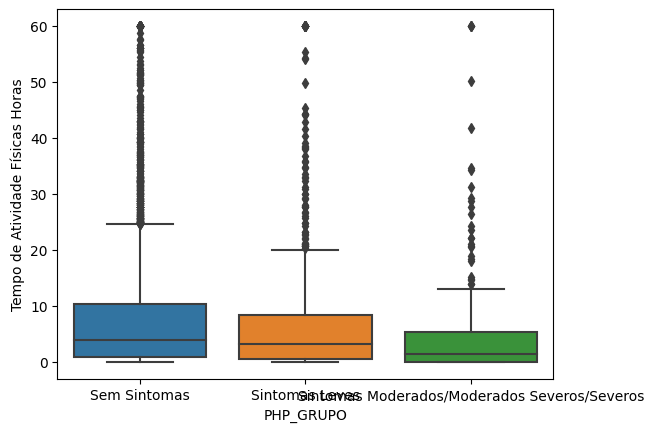

In [84]:
# COMPARAÇÃO EM BOXPLOT DO TEMPO DE ATIVIDADE FÍSICA

grafico_boxplot_grp(df_completo_copia, "Tempo_Atividade_H", "Tempo de Atividade Físicas Horas")

In [133]:
# APLICANDO O TESTE DE HIPOTESE "QUI-QUADRADO" PARA COMPARAR O TEMPO DE ATIVIDADES FÍSICAS

crosstab4 = pd.crosstab(df_completo_copia['Tempo_Atividade_H'],df_completo_copia['PHP_GRUPO'])
stat, p, df, expected = chi2_contingency(crosstab4)
print('stat = %.3f, p = %.3f' % (stat, p))

# HIPOTESE "NULA" NÃO POSSUI ASSOCIAÇÃO

stat = 2645.674, p = 1.000


In [123]:
# APLICANDO O TESTE DE HIPOTESE "QUI-QUADRADO" PARA COMPARAR A ETNIA

crosstab2 = pd.crosstab(df_completo_copia['Etnia'],df_completo_copia['PHP_GRUPO'])
stat, p, df, expected = chi2_contingency(crosstab2)
print('stat = %.3f, p = %.3f' % (stat, p))

# HIPOTESE "ALTERNATIVA" POSSUI ASSOCIAÇÃO

stat = 23.138, p = 0.003


In [124]:
# APLICANDO O TESTE DE HIPOTESE "QUI-QUADRADO" PARA COMPARAR A ESCOLARIDADE

crosstab3 = pd.crosstab(df_completo_copia['Escolaridade'],df_completo_copia['PHP_GRUPO'])
stat, p, df, expected = chi2_contingency(crosstab3)
print('stat = %.3f, p = %.3f' % (stat, p))

# HIPOTESE "ALTERNATIVA" POSSUI ASSOCIAÇÃO

stat = 56.767, p = 0.000


In [131]:
# APLICANDO O TESTE DE HIPOTESE "QUI-QUADRADO" PARA COMPARAR A ADERENCIA

crosstab5 = pd.crosstab(df_completo_copia['Grupo_Aderencia'],df_completo_copia['PHP_GRUPO'])
stat, p, df, expected = chi2_contingency(crosstab5)
print('stat = %.3f, p = %.3f' % (stat, p))

# HIPOTESE "ALTERNATIVA" POSSUI ASSOCIAÇÃO

stat = 56.068, p = 0.000
